<a href="https://colab.research.google.com/github/ZoofishanChohan/Deep-Learning-and-Neural-Networks/blob/main/Long_Distance_RNN_using_LSTM_and_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.layers import Dense, Flatten, GlobalMaxPooling2D, Input, LSTM, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Building non-linear long distance data set
T = 10
D = 1
X = []
Y = []
def get_label(x,i1,i2,i3):
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0
for t in range(5000):
  x = np.random.randn(T)
  y = get_label(x,0,1,2) # long distance
  X.append(x)
  Y.append(y)
X = np.array(X)
Y = np.array(Y)
N = len(X)

In [5]:
# checking on linear model
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i,x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the data
r = model.fit(X , Y, epochs = 100, validation_split = 0.5)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4981 - loss: 0.8643 - val_accuracy: 0.5056 - val_loss: 0.8276
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5046 - loss: 0.8157 - val_accuracy: 0.5064 - val_loss: 0.8012
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4927 - loss: 0.8002 - val_accuracy: 0.5024 - val_loss: 0.7783
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5016 - loss: 0.7771 - val_accuracy: 0.5000 - val_loss: 0.7597
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4933 - loss: 0.7553 - val_accuracy: 0.5016 - val_loss: 0.7440
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5208 - loss: 0.7345 - val_accuracy: 0.4980 - val_loss: 0.7319
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5094 - loss: 0.7217 - val_accuracy: 0.4944 - val_loss: 0.7236
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5020 - loss: 0.7219 - val_accuracy: 0.4980 - v

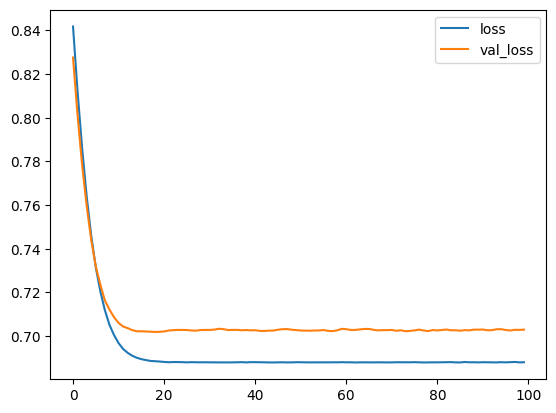

In [6]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


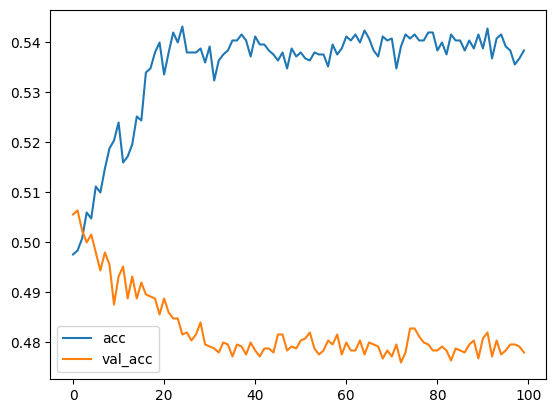

In [7]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
# checkin on SimpleRNN
i = Input(shape=(T,D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the data
r = model.fit(X.reshape(N,T,D) , Y, epochs = 100, validation_split = 0.5)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5100 - loss: 0.6950 - val_accuracy: 0.5116 - val_loss: 0.6932
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5031 - loss: 0.6939 - val_accuracy: 0.5128 - val_loss: 0.6937
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5345 - loss: 0.6907 - val_accuracy: 0.5112 - val_loss: 0.6938
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5279 - loss: 0.6923 - val_accuracy: 0.5028 - val_loss: 0.6946
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5243 - loss: 0.6915 - val_accuracy: 0.5012 - val_loss: 0.6946
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5127 - loss: 0.6929 - val_accuracy: 0.4988 - val_loss: 0.6948
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5298 - loss: 0.6926 - val_accuracy: 0.4992 - val_loss: 0.6952
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5232 - loss: 0.6923 - val_accuracy: 0.49

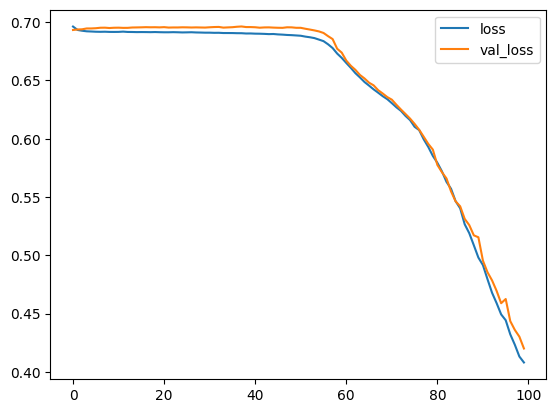

In [9]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

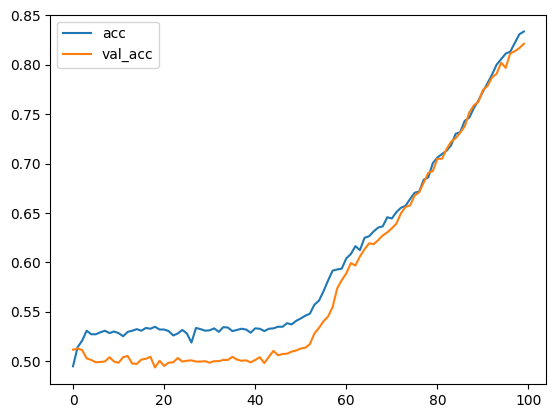

In [10]:
#plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()